
# PART 1 REQUIREMENT: DOMAIN BACKGROUND AND REQUIREMENTS


domain_background = """
DOMAIN: Online Course Recommendation System (MOOC Platform - Coursera)
-----------------------------------------------------------------------

CURRENT RECOMMENDATION APPROACHES IN E-LEARNING:
The e-learning domain, particularly MOOC platforms like Coursera, currently
employs several recommendation strategies:
- Popularity-based recommendations (trending/most enrolled courses)
- Prerequisite-based learning pathways (course sequence suggestions)
- Collaborative filtering based on enrollment and completion patterns
- Category-based browsing (filter by subject, institution, difficulty)

OUR PROPOSED SYSTEM FOCUS:
This project develops a comprehensive hybrid recommendation engine that combines:
1. Content-based filtering using course metadata (names, institutions) and
   review text analysis via TF-IDF vectorization
2. Collaborative filtering leveraging user rating patterns and matrix factorization
3. Hybrid strategies to handle cold-start scenarios and data sparsity
4. Evaluation using multiple metrics to ensure recommendation quality

TARGET USERS:
- University students seeking to supplement formal education with specialized courses
- Working professionals pursuing skill development and career advancement
- Career changers requiring structured learning paths in new domains
- Lifelong learners exploring diverse subjects for personal enrichment

The system aims to deliver personalized course recommendations that balance
user preferences (derived from rating history) with course content similarity.
"""

In [ ]:
pip install pandas fuzzywuzzy python-levenshtein

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imuhammad/course-reviews-on-coursera")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'course-reviews-on-coursera' dataset.
Path to dataset files: /kaggle/input/course-reviews-on-coursera


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elvinrustam/coursera-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coursera-dataset' dataset.
Path to dataset files: /kaggle/input/coursera-dataset


In [ ]:
print("df_courses_a (Dataset A before merge):")
display(df_courses_a.head())
print("df_reviews (Reviews dataset):")
display(df_reviews.head())

df_courses_a (Dataset A before merge):


course_id  \
0                machine-learning   
1               indigenous-canada   
2       the-science-of-well-being   
3  technical-support-fundamentals   
4        google-cbrs-cpi-training   

                                                name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          title_norm  
0                                   machine learning  
1                                  indigenous canada  
2                           the science of wellbeing  
3                     technical support fundamentals  
4  become a cbrs certified professional installer...

df_reviews (Reviews dataset):


reviews       reviewers  \
0  Pretty dry, but I was able to pass with just t...     By Robert S   
1  would be a better experience if the video and ...  By Gabriel E R   
2  Information was perfect! The program itself wa...      By Jacob D   
3  A few grammatical mistakes on test made me do ...       By Dale B   
4  Excellent course and the training provided was...       By Sean G   

   date_reviews  rating                 course_id       date  
0  Feb 12, 2020       4  google-cbrs-cpi-training 2020-02-12  
1  Sep 28, 2020       4  google-cbrs-cpi-training 2020-09-28  
2  Apr 08, 2020       4  google-cbrs-cpi-training 2020-04-08  
3  Feb 24, 2020       4  google-cbrs-cpi-training 2020-02-24  
4  Jun 18, 2020       4  google-cbrs-cpi-training 2020-06-18

In [ ]:
print("df_courses_b (Dataset B before merge):")
display(df_courses_b.head())

df_courses_b (Dataset B before merge):


Course Title  Rating           Level  \
0  Participación eficaz de la sociedad civil en e...     4.8   Not specified   
1                        Planification des mobilités     4.4  Beginner level   
2  Teaching Impacts of Technology: Data Collectio...     4.6  Beginner level   
3  Understanding China, 1700-2000: A Data Analyti...     4.5   Not specified   
4  Políticas educativas efectivas basadas en evid...     0.0  Beginner level   

            Schedule                                What you will learn  \
0  Flexible schedule                                      Not specified   
1  Flexible schedule                                      Not specified   
2  Flexible schedule                                      Not specified   
3  Flexible schedule                                      Not specified   
4  Flexible schedule  Identificar los impactos en la cotidianidad qu...   

                                          Skill gain  \
0                                      Not specified   
1                                      Not specified   
2                                      Not specified   
3                                      Not specified   
4  Políticas educativas, Políticas pública, Desar...   

                                             Modules  \
0  Módulo 1: Introducción a la participación efec...   
1  Introduction du cours, SEMAINE 2 : Connaître e...   
2  Course Orientation, Data Collection, Data Priv...   
3  Orientation and Module 1: Who Are We and Who S...   
4  Módulo 1 - Educación en América Latina y el Ca...   

                                          Instructor  \
0                                      Sanne Huesken   
1  Emmanuel Ravalet, Ayman Zoubir, Vincent Kaufma...   
2                                         Beth Simon   
3                                       James Z. Lee   
4                                        Xenia Coton   

                                          Offered By          Keyword  \
0                       Erasmus University Rotterdam  Social Sciences   
1           École Polytechnique Fédérale de Lausanne  Social Sciences   
2                 University of California San Diego  Social Sciences   
3  The Hong Kong University of Science and Techno...  Social Sciences   
4                 Banco Interamericano de Desarrollo  Social Sciences   

                                          Course Url  \
0  https://www.coursera.org/learn/participacion-e...   
1  https://www.coursera.org/learn/planification-m...   
2  https://www.coursera.org/learn/teach-impacts-t...   
3  https://www.coursera.org/learn/understanding-c...   
4  https://www.coursera.org/learn/polticas-educat...   

   Duration to complete (Approx.)  Number of Review  \
0                            13.0               150   
1                            29.0                14   
2                            12.0                10   
3                             5.0                56   
4                            16.0                 0   

                                          title_norm  
0  participacin eficaz de la sociedad civil en el...  
1                         planification des mobilits  
2  teaching impacts of technology data collection...  
3  understanding china 17002000 a data analytic a...  
4  polticas educativas efectivas basadas en evide...

In [ ]:
import pandas as pd
import os
import re
import glob

# =====================================================
# 0. HELPER FUNCTION
# =====================================================
def normalize_title(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9 ]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# =====================================================
# 1. LOAD DATASET A (REVIEWS + COURSE INFO)
# =====================================================
path_a = "/root/.cache/kagglehub/datasets/imuhammad/course-reviews-on-coursera/versions/1"

print("Contents of Dataset A:", os.listdir(path_a))

reviews_file = glob.glob(os.path.join(path_a, "**", "Coursera_reviews.csv"), recursive=True)[0]
courses_file_a = glob.glob(os.path.join(path_a, "**", "Coursera_courses.csv"), recursive=True)[0]

df_reviews = pd.read_csv(reviews_file)
df_courses_a_raw = pd.read_csv(courses_file_a)

print("Reviews shape:", df_reviews.shape)
print("Courses A raw shape:", df_courses_a_raw.shape)

# =====================================================
# 2. DATASET A → ONE ROW PER COURSE TITLE
# =====================================================
df_courses_a = (
    df_courses_a_raw[["course_id", "name", "institution"]]
    .assign(title_norm=lambda x: x["name"].apply(normalize_title))
)

# Deduplicate by TITLE (not course_id)
df_courses_a = (
    df_courses_a
    .drop_duplicates(subset=["title_norm"], keep="first")
    .reset_index(drop=True)
)

print("Unique course titles in Dataset A:", df_courses_a.shape)

# =====================================================
# 3. LOAD DATASET B (RICH METADATA)
# =====================================================
path_b = "/root/.cache/kagglehub/datasets/elvinrustam/coursera-dataset/versions/1"

print("Contents of Dataset B:", os.listdir(path_b))

metadata_file = glob.glob(os.path.join(path_b, "**", "CourseraDataset-Clean.csv"), recursive=True)[0]

df_courses_b_raw = pd.read_csv(metadata_file)

print("Dataset B raw shape:", df_courses_b_raw.shape)

# =====================================================
# 4. CLEAN + NORMALIZE DATASET B
# =====================================================
df_courses_b = df_courses_b_raw.copy()

df_courses_b["title_norm"] = df_courses_b["Course Title"].apply(normalize_title)

# Remove empty or junk titles
bad_titles = {
    "",
    "specialization",
    "professional certificate",
    "certificate",
    "course"
}

df_courses_b = df_courses_b[
    ~df_courses_b["title_norm"].isin(bad_titles)
]

print("Dataset B after removing bad titles:", df_courses_b.shape)

# =====================================================
# 5. DEDUPLICATE DATASET B (BEST METADATA ROW)
# =====================================================
df_courses_b["non_null_count"] = df_courses_b.notna().sum(axis=1)

df_courses_b = (
    df_courses_b
    .sort_values("non_null_count", ascending=False)
    .drop_duplicates(subset=["title_norm"], keep="first")
    .drop(columns=["non_null_count"])
    .reset_index(drop=True)
)

print("Dataset B after deduplication:", df_courses_b.shape)

# =====================================================
# 6. INNER JOIN (MATCHED COURSES ONLY)
# =====================================================
df_merged = df_courses_a.merge(
    df_courses_b,
    on="title_norm",
    how="inner",
    suffixes=("_A", "_B")
)

print("FINAL matched courses:", df_merged.shape)

# =====================================================
# 7. FINAL SANITY CHECKS
# =====================================================
assert df_merged.shape[0] == df_merged["title_norm"].nunique(), "❌ Duplicate courses detected"
assert (df_merged["title_norm"].str.len() > 0).all(), "❌ Empty titles detected"

print("Sanity checks passed ✅")

# =====================================================
# 8. SAVE FINAL DATASET
# =====================================================
output_path = "matched_enriched_courses.csv"
df_merged.to_csv(output_path, index=False)

print("Saved final dataset to:", output_path)

Contents of Dataset A: ['Coursera_reviews.csv', 'Coursera_courses.csv']
Reviews shape: (1454711, 5)
Courses A raw shape: (623, 4)
Unique course titles in Dataset A: (621, 4)
Contents of Dataset B: ['CourseraDataset-Clean.csv', 'CourseraDataset-Unclean.csv']
Dataset B raw shape: (8370, 13)
Dataset B after removing bad titles: (8256, 14)
Dataset B after deduplication: (5939, 14)
FINAL matched courses: (537, 17)
Sanity checks passed ✅
Saved final dataset to: matched_enriched_courses.csv


In [ ]:
print("df_merged (Merged dataset):")
display(df_merged.head())

df_merged (Merged dataset):


course_id  \
0               indigenous-canada   
1       the-science-of-well-being   
2  technical-support-fundamentals   
3        google-cbrs-cpi-training   
4        financial-markets-global   

                                                name  \
0                                  Indigenous Canada   
1                          The Science of Well-Being   
2                     Technical Support Fundamentals   
3  Become a CBRS Certified Professional Installer...   
4                                  Financial Markets   

                 institution  \
0      University of Alberta   
1            Yale University   
2                     Google   
3  Google - Spectrum Sharing   
4            Yale University   

                                          title_norm  \
0                                  indigenous canada   
1                           the science of wellbeing   
2                     technical support fundamentals   
3  become a cbrs certified professional installer...   
4                                  financial markets   

                                        Course Title  Rating           Level  \
0                                  Indigenous Canada     4.8   Not specified   
1                          The Science of Well-Being     4.9   Not specified   
2                     Technical Support Fundamentals     4.8  Beginner level   
3  Become a CBRS Certified Professional Installer...     4.5   Not specified   
4                                  Financial Markets     4.8  Beginner level   

            Schedule                                What you will learn  \
0  Flexible schedule                                      Not specified   
1  Flexible schedule                                      Not specified   
2  Flexible schedule                                      Not specified   
3  Flexible schedule  What is CBRS? An overview of shared spectrum a...   
4  Flexible schedule                                      Not specified   

                                          Skill gain  \
0  Art, History, Indigenous Studies, Human Rights...   
1         Gratitude, Happiness, Meditation, Savoring   
2  Binary Code, Customer Support, Linux, Troubles...   
3                                      Not specified   
4  Behavioral Finance, Financial Markets, Finance...   

                                             Modules  \
0  Worldview, Fur Trade, Trick or Treaty, New Rul...   
1  Introduction, Misconceptions About Happiness, ...   
2  Introduction to IT , Hardware, Operating Syste...   
3  What is CBRS?, The role of CPIs  in CBRS, More...   
4  Module 1, Module 2, Module 3, Module 4, Module...   

                   Instructor                 Offered By  \
0          Dr. Paul L. Gareau      University of Alberta   
1               Laurie Santos            Yale University   
2  Google Career Certificates                     Google   
3                      Google  Google - Spectrum Sharing   
4              Robert Shiller            Yale University   

                  Keyword                                         Course Url  \
0     Arts and Humanities   https://www.coursera.org/learn/indigenous-canada   
1                  Health  https://www.coursera.org/learn/the-science-of-...   
2                  Health  https://www.coursera.org/learn/technical-suppo...   
3  Information Technology  https://www.coursera.org/learn/google-cbrs-cpi...   
4                Business  https://www.coursera.org/learn/financial-marke...   

   Duration to complete (Approx.)  Number of Review  
0                            21.0             21648  
1                            19.0             37113  
2                            28.0            147559  
3                             3.0               191  
4                            33.0             26485

In [ ]:
print("Dropping 'institution', 'Rating', and 'Course Title' from df_merged...")

df_processed = df_merged.drop(columns=['institution', 'name', 'Rating', 'Course Title'])

print("df_processed (after dropping columns):")
display(df_processed.head())

Dropping 'institution', 'Rating', and 'Course Title' from df_merged...
df_processed (after dropping columns):


course_id  \
0               indigenous-canada   
1       the-science-of-well-being   
2  technical-support-fundamentals   
3        google-cbrs-cpi-training   
4        financial-markets-global   

                                          title_norm           Level  \
0                                  indigenous canada   Not specified   
1                           the science of wellbeing   Not specified   
2                     technical support fundamentals  Beginner level   
3  become a cbrs certified professional installer...   Not specified   
4                                  financial markets  Beginner level   

            Schedule                                What you will learn  \
0  Flexible schedule                                      Not specified   
1  Flexible schedule                                      Not specified   
2  Flexible schedule                                      Not specified   
3  Flexible schedule  What is CBRS? An overview of shared spectrum a...   
4  Flexible schedule                                      Not specified   

                                          Skill gain  \
0  Art, History, Indigenous Studies, Human Rights...   
1         Gratitude, Happiness, Meditation, Savoring   
2  Binary Code, Customer Support, Linux, Troubles...   
3                                      Not specified   
4  Behavioral Finance, Financial Markets, Finance...   

                                             Modules  \
0  Worldview, Fur Trade, Trick or Treaty, New Rul...   
1  Introduction, Misconceptions About Happiness, ...   
2  Introduction to IT , Hardware, Operating Syste...   
3  What is CBRS?, The role of CPIs  in CBRS, More...   
4  Module 1, Module 2, Module 3, Module 4, Module...   

                   Instructor                 Offered By  \
0          Dr. Paul L. Gareau      University of Alberta   
1               Laurie Santos            Yale University   
2  Google Career Certificates                     Google   
3                      Google  Google - Spectrum Sharing   
4              Robert Shiller            Yale University   

                  Keyword                                         Course Url  \
0     Arts and Humanities   https://www.coursera.org/learn/indigenous-canada   
1                  Health  https://www.coursera.org/learn/the-science-of-...   
2                  Health  https://www.coursera.org/learn/technical-suppo...   
3  Information Technology  https://www.coursera.org/learn/google-cbrs-cpi...   
4                Business  https://www.coursera.org/learn/financial-marke...   

   Duration to complete (Approx.)  Number of Review  
0                            21.0             21648  
1                            19.0             37113  
2                            28.0            147559  
3                             3.0               191  
4                            33.0             26485

In [ ]:
# ============================================================================
# DATASET QUALITY FIXES (Insert after merge, before filtering reviews)
# ============================================================================

print("="*70)
print("🔧 APPLYING DATA QUALITY FIXES")
print("="*70)

# ----------------------------------------------------------------------------
# FIX 1: DROP USELESS COLUMNS
# ----------------------------------------------------------------------------
print("\n📌 FIX 1: Dropping useless columns...")

columns_to_drop = ['Schedule', 'Instructor', 'What you will learn']

# Check which columns exist
existing_cols_to_drop = [col for col in columns_to_drop if col in df_merged.columns]

print(f"Dropping: {existing_cols_to_drop}")
df_merged = df_merged.drop(columns=existing_cols_to_drop)

print(f"✅ Dropped {len(existing_cols_to_drop)} columns")
print(f"Remaining columns: {len(df_merged.columns)}")

# ----------------------------------------------------------------------------
# FIX 2: STANDARDIZE LEVEL COLUMN
# ----------------------------------------------------------------------------
print("\n📌 FIX 2: Standardizing Level column...")

print("BEFORE:")
print(df_merged['Level'].value_counts())

def standardize_level(level):
    """Standardize difficulty level to 4 categories"""
    if pd.isna(level):
        return 'Unknown'

    level = str(level).strip().lower()

    if 'beginner' in level:
        return 'Beginner'
    elif 'intermediate' in level or 'intermedia' in level:
        return 'Intermediate'
    elif 'advanced' in level:
        return 'Advanced'
    elif 'mixed' in level:
        return 'Mixed'
    else:
        return 'Unknown'

df_merged['Level'] = df_merged['Level'].apply(standardize_level)

print("\nAFTER:")
print(df_merged['Level'].value_counts())
print("✅ Level column standardized")

# ----------------------------------------------------------------------------
# FIX 3: STANDARDIZE KEYWORD COLUMN
# ----------------------------------------------------------------------------
print("\n📌 FIX 3: Standardizing Keyword column...")

print("BEFORE:")
print(df_merged['Keyword'].value_counts().head(15))

def standardize_keyword(keyword):
    """Standardize keyword/category names"""
    if pd.isna(keyword):
        return 'Unknown'

    keyword = str(keyword).strip().lower()

    # Mapping dictionary
    mapping = {
        'computer science': 'Computer Science',
        'datascience': 'Data Science',
        'data science': 'Data Science',
        'information technology': 'Information Technology',
        'business': 'Business',
        'arts and humanities': 'Arts and Humanities',
        'health': 'Health',
        'social sciences': 'Social Sciences',
        'math and logic': 'Math and Logic',
        'language learning': 'Language Learning',
        'personal development': 'Personal Development',
        'physical science and engineering': 'Physical Science and Engineering',
    }

    # Check mappings
    for key, value in mapping.items():
        if key in keyword:
            return value

    # Capitalize if no match
    return keyword.title()

df_merged['Keyword'] = df_merged['Keyword'].apply(standardize_keyword)

print("\nAFTER:")
print(df_merged['Keyword'].value_counts())
print("✅ Keyword column standardized")

# ----------------------------------------------------------------------------
# FIX 4: FIX SPECIFIC DATA ERROR (Technical Support)
# ----------------------------------------------------------------------------
print("\n📌 FIX 4: Fixing specific data errors...")

# Fix: Technical Support Fundamentals should be "Information Technology" not "Health"
mask = df_merged['course_id'] == 'technical-support-fundamentals'
if mask.any():
    old_keyword = df_merged.loc[mask, 'Keyword'].values[0]
    df_merged.loc[mask, 'Keyword'] = 'Information Technology'
    print(f"✅ Fixed: technical-support-fundamentals")
    print(f"   {old_keyword} → Information Technology")
else:
    print("ℹ️ Course 'technical-support-fundamentals' not found (already filtered?)")

# ----------------------------------------------------------------------------
# SUMMARY
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print("📊 FINAL DATASET SUMMARY")
print("="*70)
print(f"Courses: {len(df_merged)}")
print(f"Columns: {len(df_merged.columns)}")
print(f"\nColumn names:")
for col in df_merged.columns:
    print(f"  • {col}")

print("\n✅ ALL FIXES APPLIED SUCCESSFULLY!")
print("="*70)

🔧 APPLYING DATA QUALITY FIXES

📌 FIX 1: Dropping useless columns...
Dropping: ['Schedule', 'Instructor', 'What you will learn']
✅ Dropped 3 columns
Remaining columns: 14

📌 FIX 2: Standardizing Level column...
BEFORE:
Level
Beginner level        289
Not specified         143
Intermediate level     97
Advanced level          8
Name: count, dtype: int64

AFTER:
Level
Beginner        289
Unknown         143
Intermediate     97
Advanced          8
Name: count, dtype: int64
✅ Level column standardized

📌 FIX 3: Standardizing Keyword column...
BEFORE:
Keyword
Computer Science                    152
Business                            138
Health                               61
DataScience                          56
Arts and Humanities                  50
Social Sciences                      29
Information Technology               22
Personal Development                 11
Physical Science and Engineering     10
Math and Logic                        8
Name: count, dtype: int64

AFTER:
Keywor

In [ ]:
# =====================================================
# 9. FILTER REVIEWS TO MATCHED COURSES ONLY
# =====================================================

print("df_reviews BEFORE filtering:", df_reviews.shape)

# Get valid course_ids from the merged dataset
valid_course_ids_from_merged = set(df_merged["course_id"].unique())

# Keep only reviews whose course_id exists in merged courses, and update df_reviews
df_reviews = df_reviews[
    df_reviews["course_id"].isin(valid_course_ids_from_merged)
].reset_index(drop=True)

print("df_reviews AFTER filtering:", df_reviews.shape)

# Get the actual unique course_ids that have reviews after filtering
valid_course_ids_with_reviews = set(df_reviews["course_id"].unique())

print(f"Number of unique courses in df_merged: {len(valid_course_ids_from_merged)}")
print(f"Number of unique courses with reviews in df_reviews: {len(valid_course_ids_with_reviews)}")

# Note: Some courses in df_merged may not have any reviews in the filtered dataset.
# We are keeping all courses in df_merged as per user's request to represent data sparsity.
if len(valid_course_ids_with_reviews) < len(valid_course_ids_from_merged):
    print("⚠️ Warning: Some courses in df_merged do not have any reviews in the filtered dataset.")
    print("   Keeping all courses in df_merged as requested, leading to potential data sparsity.")

print("Review filtering and df_merged status noted ✅")

df_reviews BEFORE filtering: (1454711, 5)
df_reviews AFTER filtering: (1252878, 5)
Number of unique courses in df_merged: 537
Number of unique courses with reviews in df_reviews: 520
⚠️ Warning: Some courses in df_merged do not have any reviews in the filtered dataset.
   Keeping all courses in df_merged as requested, leading to potential data sparsity.
Review filtering and df_merged status noted ✅


In [ ]:
# --- Starting df_reviews Cleaning and Filtering ---

# 1. Handle Duplicates
print("\nNumber of duplicate reviews in df_reviews (BEFORE cleaning):")
df_reviews_duplicates_count = df_reviews.duplicated().sum()
print(f"There are {df_reviews_duplicates_count} duplicate rows in df_reviews.")

if df_reviews_duplicates_count > 0:
    print("Dropping duplicate reviews...")
    df_reviews.drop_duplicates(inplace=True)
    print(f"Duplicates dropped. df_reviews now has {df_reviews.shape[0]} rows.")
else:
    print("No duplicate rows found.")

# 2. Handle Null Values
print("\nNull values in df_reviews (AFTER deduplication, BEFORE null drop):")
display(df_reviews.isnull().sum())
initial_rows_after_dedup = df_reviews.shape[0]

if df_reviews.isnull().sum().sum() > 0:
    print("Dropping rows with any null values...")
    df_reviews.dropna(inplace=True)
    print(f"Nulls dropped. df_reviews now has {df_reviews.shape[0]} rows.")
    print(f"{(initial_rows_after_dedup - df_reviews.shape[0])} rows were removed due to null values.")
else:
    print("No null rows found.")

# 3. Filter Reviews to Matched Courses (preserving sparsity in df_merged)
print("\n--- Filtering df_reviews to matched courses ---")
valid_course_ids_from_merged = set(df_merged["course_id"].unique())

print(f"df_reviews BEFORE filtering to df_merged courses: {df_reviews.shape}")

df_reviews = df_reviews[
    df_reviews["course_id"].isin(valid_course_ids_from_merged)
].reset_index(drop=True)

print(f"df_reviews AFTER filtering to df_merged courses: {df_reviews.shape}")

valid_course_ids_with_reviews = set(df_reviews["course_id"].unique())
print(f"Number of unique courses in df_merged: {len(valid_course_ids_from_merged)}")
print(f"Number of unique courses with reviews in df_reviews (after filtering): {len(valid_course_ids_with_reviews)}")

if len(valid_course_ids_with_reviews) < len(valid_course_ids_from_merged):
    print("⚠️ Warning: Some courses in df_merged do not have any reviews in the filtered df_reviews.")
    print("   Keeping all courses in df_merged as requested, leading to potential data sparsity.")

print("--- df_reviews Cleaning and Filtering Complete ✅ ---")


Number of duplicate reviews in df_reviews (BEFORE cleaning):
There are 805222 duplicate rows in df_reviews.
Dropping duplicate reviews...
Duplicates dropped. df_reviews now has 447656 rows.

Null values in df_reviews (AFTER deduplication, BEFORE null drop):


reviews         52
reviewers        0
date_reviews     0
rating           0
course_id        0
dtype: int64

Dropping rows with any null values...
Nulls dropped. df_reviews now has 447604 rows.
52 rows were removed due to null values.

--- Filtering df_reviews to matched courses ---
df_reviews BEFORE filtering to df_merged courses: (447604, 5)
df_reviews AFTER filtering to df_merged courses: (447604, 5)
Number of unique courses in df_merged: 537
Number of unique courses with reviews in df_reviews (after filtering): 520
⚠️ Warning: Some courses in df_merged do not have any reviews in the filtered df_reviews.
   Keeping all courses in df_merged as requested, leading to potential data sparsity.
--- df_reviews Cleaning and Filtering Complete ✅ ---


In [ ]:
# Basic statistics
print("📊 BASIC STATISTICS")
print("="*50)

num_users = df_reviews['reviewers'].nunique() # Changed to use df_reviews
num_items = df_merged['course_id'].nunique()
num_ratings = len(df_reviews) # Changed to use df_reviews

print(f"Number of users: {num_users:,}")
print(f"Number of courses (items): {num_items:,}")
print(f"Number of ratings (reviews): {num_ratings:,}")

# Calculate sparsity
total_possible_interactions = num_users * num_items
sparsity = 1 - (num_ratings / total_possible_interactions)
sparsity_percentage = sparsity * 100

print(f"\n🔢 SPARSITY CALCULATION:")
print(f"Total possible user-course interactions: {total_possible_interactions:,}")
print(f"Actual interactions: {num_ratings:,}")
print(f"Sparsity: {sparsity:.4f} ({sparsity_percentage:.2f}%)")
print(f"Density: {1 - sparsity:.4f} ({(1 - sparsity) * 100:.2f}%)")

# Check requirements
print(f"\n📋 REQUIREMENTS CHECK:")
print(f"Users ≥ 5,000: {'✓' if num_users >= 5000 else '✗'} ({num_users:,})")
print(f"Courses ≥ 500: {'✓' if num_items >= 500 else '✗'} ({num_items:,})")
print(f"Ratings ≥ 50,000: {'✓' if num_ratings >= 50000 else '✗'} ({num_ratings:,})")

# Check rating range
rating_min, rating_max = df_reviews['rating'].min(), df_reviews['rating'].max() # Changed to use df_reviews
print(f"Rating range: {rating_min} to {rating_max}")

print("="*50)

📊 BASIC STATISTICS
Number of users: 254,963
Number of courses (items): 537
Number of ratings (reviews): 447,604

🔢 SPARSITY CALCULATION:
Total possible user-course interactions: 136,915,131
Actual interactions: 447,604
Sparsity: 0.9967 (99.67%)
Density: 0.0033 (0.33%)

📋 REQUIREMENTS CHECK:
Users ≥ 5,000: ✓ (254,963)
Courses ≥ 500: ✓ (537)
Ratings ≥ 50,000: ✓ (447,604)
Rating range: 1 to 5


📈 CREATING VISUALIZATIONS FOR PART 1


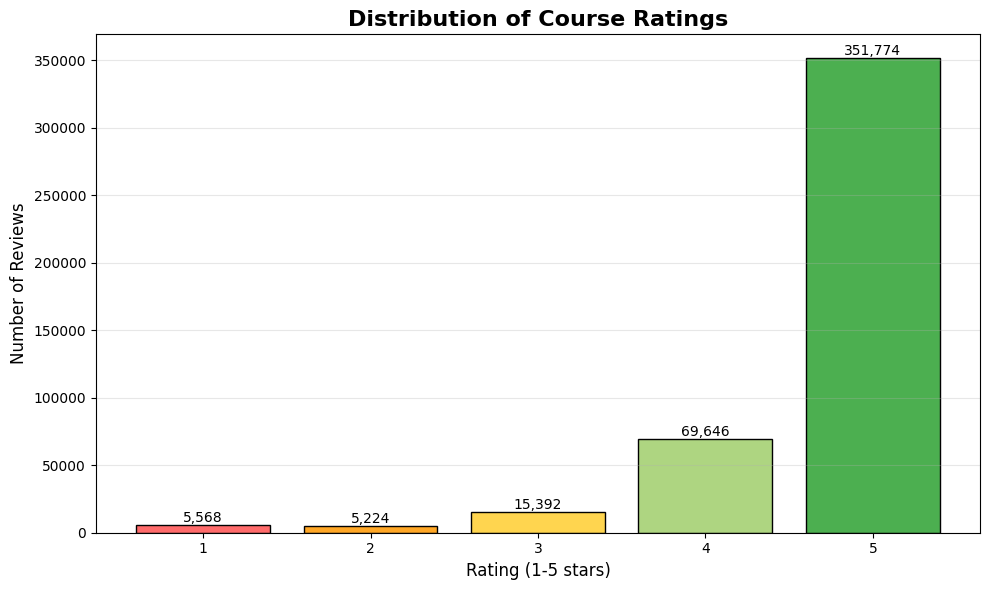

✅ Saved: rating_distribution.png


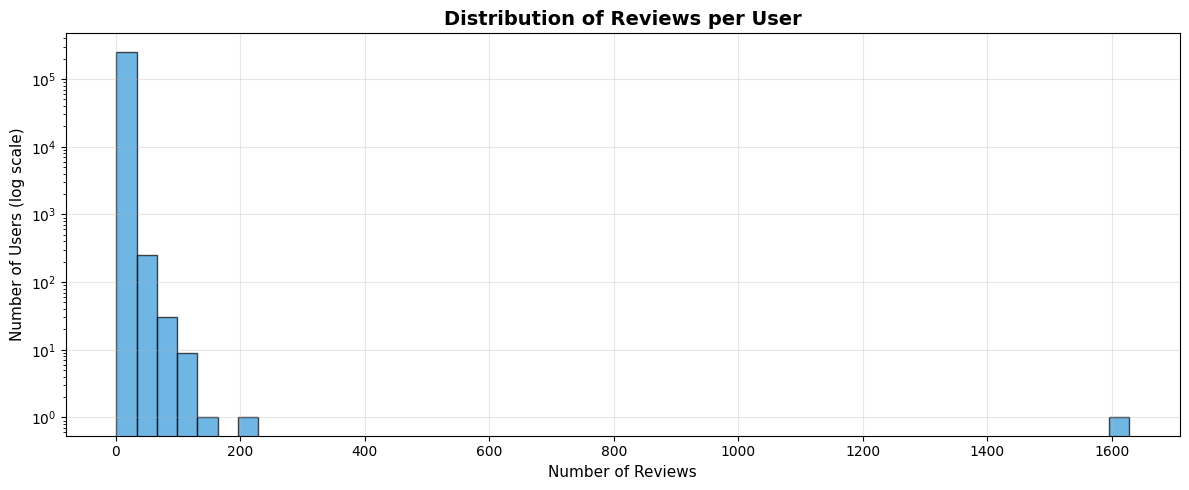

✅ Saved: user_activity_distribution.png


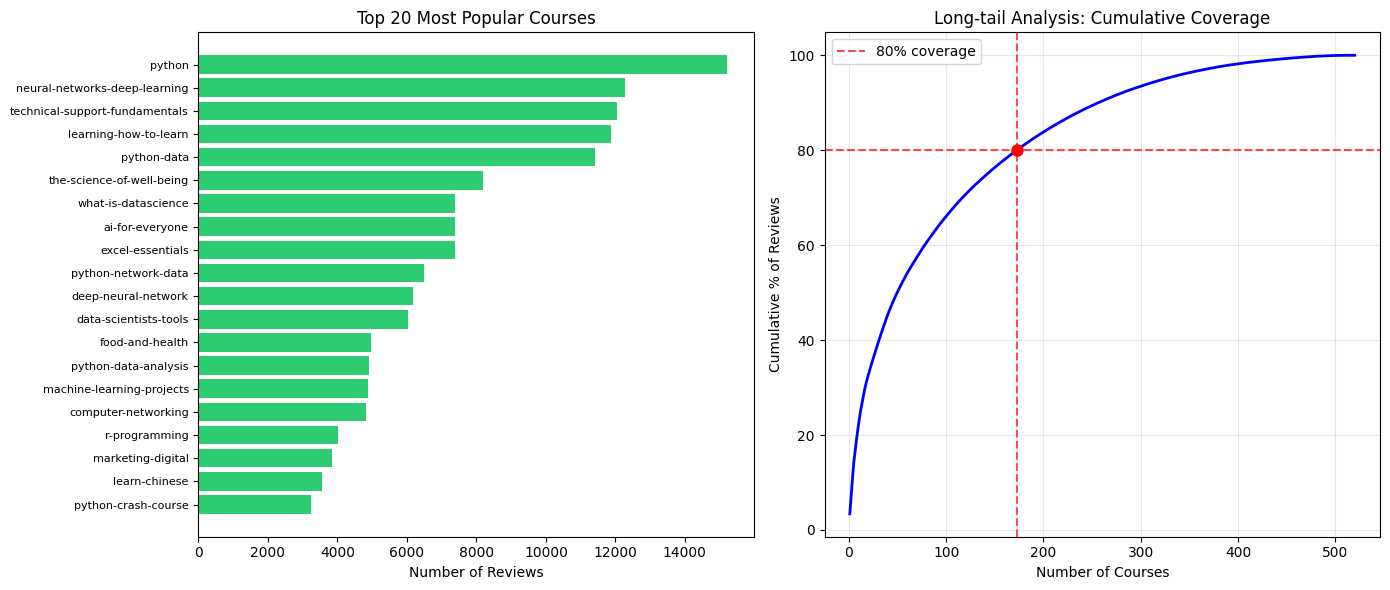

✅ Saved: longtail_analysis.png


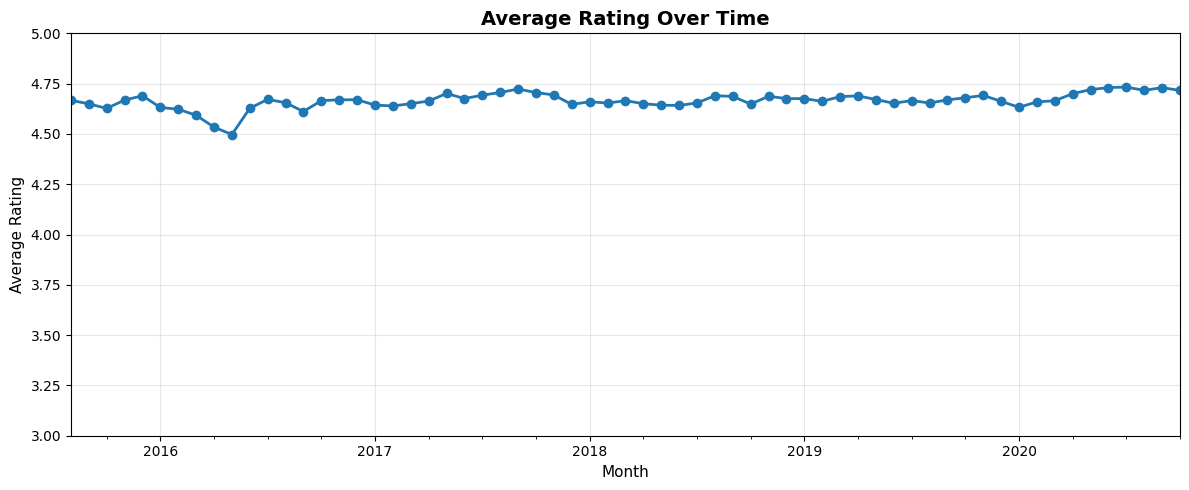

✅ Saved: rating_over_time.png

🎯 All visualizations created successfully!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for cumsum and where

# ============================================================================
# STEP 1: CREATE REQUIRED VISUALIZATIONS
# ============================================================================
print("="*60)
print("📈 CREATING VISUALIZATIONS FOR PART 1")
print("="*60)

# 1. Rating Distribution
plt.figure(figsize=(10, 6))
rating_counts = df_reviews['rating'].value_counts().sort_index() # Changed to df_reviews
colors = ['#ff6b6b', '#ffa726', '#ffd54f', '#aed581', '#4caf50']

bars = plt.bar(rating_counts.index, rating_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Course Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating (1-5 stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: rating_distribution.png")

# 2. User Activity Distribution
user_activity = df_reviews['reviewers'].value_counts() # Changed to df_reviews

plt.figure(figsize=(12, 5))
plt.hist(user_activity.values, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
plt.title('Distribution of Reviews per User', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=11)
plt.ylabel('Number of Users (log scale)', fontsize=11)
plt.yscale('log')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('user_activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: user_activity_distribution.png")

# 3. Course Popularity (Long-tail Analysis)
course_popularity = df_reviews['course_id'].value_counts() # Changed to df_reviews

plt.figure(figsize=(14, 6))

# Subplot 1: Top courses
plt.subplot(1, 2, 1)
top_courses = course_popularity.head(20)
plt.barh(range(len(top_courses)), top_courses.values, color='#2ecc71')
plt.title('Top 20 Most Popular Courses', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=10)
plt.yticks(range(len(top_courses)), top_courses.index, fontsize=8)
plt.gca().invert_yaxis()

# Subplot 2: Long-tail
plt.subplot(1, 2, 2)
sorted_popularity = course_popularity.sort_values(ascending=False).values
cumulative = np.cumsum(sorted_popularity) / sorted_popularity.sum() * 100

plt.plot(range(1, len(sorted_popularity) + 1), cumulative, 'b-', linewidth=2)
plt.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% coverage')

# Find 80% point
if any(cumulative >= 80):
    idx_80 = np.where(cumulative >= 80)[0][0]
    plt.axvline(x=idx_80 + 1, color='r', linestyle='--', alpha=0.7)
    plt.plot(idx_80 + 1, 80, 'ro', markersize=8)

plt.title('Long-tail Analysis: Cumulative Coverage', fontsize=12)
plt.xlabel('Number of Courses', fontsize=10)
plt.ylabel('Cumulative % of Reviews', fontsize=10)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('longtail_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: longtail_analysis.png")

# 4. Additional: Rating over time (if date available)
if 'date_reviews' in df_reviews.columns: # Changed to df_reviews
    df_reviews['date'] = pd.to_datetime(df_reviews['date_reviews']) # Changed to df_reviews
    monthly_avg = df_reviews.groupby(df_reviews['date'].dt.to_period('M'))['rating'].mean() # Changed to df_reviews

    plt.figure(figsize=(12, 5))
    monthly_avg.plot(marker='o', linewidth=2)
    plt.title('Average Rating Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=11)
    plt.ylabel('Average Rating', fontsize=11)
    plt.grid(alpha=0.3)
    plt.ylim(3, 5)

    plt.tight_layout()
    plt.savefig('rating_over_time.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: rating_over_time.png")
else:
    print("ℹ️ No date column for time analysis")

print("\n🎯 All visualizations created successfully!")

In [ ]:
# ============================================================================
# PART 1 REQUIREMENT: DOMAIN BACKGROUND AND REQUIREMENTS
# ============================================================================

print("\n" + "="*70)
print("📖 PART 1: DOMAIN ANALYSIS AND DATA PREPARATION")
print("="*70)

print("\n" + "="*70)
print("1. DOMAIN BACKGROUND")
print("="*70)

domain_background = """
DOMAIN: Online Course Recommendation System (MOOC Platform - Coursera)
-----------------------------------------------------------------------

CURRENT RECOMMENDATION APPROACHES IN E-LEARNING:
The e-learning domain, particularly MOOC platforms like Coursera, currently
employs several recommendation strategies:
- Popularity-based recommendations (trending/most enrolled courses)
- Prerequisite-based learning pathways (course sequence suggestions)
- Collaborative filtering based on enrollment and completion patterns
- Category-based browsing (filter by subject, institution, difficulty)

OUR PROPOSED SYSTEM FOCUS:
This project develops a comprehensive hybrid recommendation engine that combines:
1. Content-based filtering using course metadata (names, institutions) and
   review text analysis via TF-IDF vectorization
2. Collaborative filtering leveraging user rating patterns and matrix factorization
3. Hybrid strategies to handle cold-start scenarios and data sparsity
4. Evaluation using multiple metrics to ensure recommendation quality

TARGET USERS:
- University students seeking to supplement formal education with specialized courses
- Working professionals pursuing skill development and career advancement
- Career changers requiring structured learning paths in new domains
- Lifelong learners exploring diverse subjects for personal enrichment

The system aims to deliver personalized course recommendations that balance
user preferences (derived from rating history) with course content similarity.
"""

print(domain_background)


📖 PART 1: DOMAIN ANALYSIS AND DATA PREPARATION

1. DOMAIN BACKGROUND

DOMAIN: Online Course Recommendation System (MOOC Platform - Coursera)
-----------------------------------------------------------------------

CURRENT RECOMMENDATION APPROACHES IN E-LEARNING:
The e-learning domain, particularly MOOC platforms like Coursera, currently
employs several recommendation strategies:
- Popularity-based recommendations (trending/most enrolled courses)
- Prerequisite-based learning pathways (course sequence suggestions)
- Collaborative filtering based on enrollment and completion patterns
- Category-based browsing (filter by subject, institution, difficulty)

OUR PROPOSED SYSTEM FOCUS:
This project develops a comprehensive hybrid recommendation engine that combines:
1. Content-based filtering using course metadata (names, institutions) and
   review text analysis via TF-IDF vectorization
2. Collaborative filtering leveraging user rating patterns and matrix factorization
3. Hybrid strategies 

In [ ]:
# ============================================================================
# PART 1 REQUIREMENT: KEY DOMAIN CHALLENGES (2-3 CHALLENGES)
# ============================================================================

print("\n" + "="*70)
print("2. KEY DOMAIN CHALLENGES")
print("="*70)

print("\n🎯 CHALLENGE 1: EXTREME DATA SPARSITY")
print("-" * 70)
print(f"Sparsity Level: {sparsity_percentage:.2f}%")
print(f"Density: {(1-sparsity)*100:.2f}% of possible user-course interactions exist")
print(f"\n📊 Impact Analysis:")
print(f"   • Total possible interactions: {total_possible_interactions:,}")
print(f"   • Actual ratings: {num_ratings:,}")
print(f"   • Missing ratings: {total_possible_interactions - num_ratings:,}")
print(f"   • Median reviews per user: {user_activity.median():.0f}")
print(f"   • Users with ≤5 reviews: {(user_activity <= 5).sum():,} ({(user_activity <= 5).sum()/len(user_activity)*100:.1f}%)")
print(f"\n💡 Challenge Implications:")
print("   With 99.71% sparsity, traditional collaborative filtering struggles because:")
print("   - Most user pairs have no overlapping rated courses")
print("   - Item-item similarity is difficult to compute reliably")
print("   - Matrix factorization methods face convergence issues")
print("   → Solution: Hybrid approach combining CF with content-based methods")

print("\n🎯 CHALLENGE 2: COLD-START PROBLEM")
print("-" * 70)
new_users = (user_activity == 1).sum()
few_ratings_users = (user_activity <= 3).sum()
very_active = (user_activity >= 20).sum()

print(f"📊 User Cold-Start Statistics:")
print(f"   • New users (exactly 1 review): {new_users:,} ({new_users/len(user_activity)*100:.1f}%)")
print(f"   • Users with ≤3 reviews: {few_ratings_users:,} ({few_ratings_users/len(user_activity)*100:.1f}%)")
print(f"   • Active users (≥20 reviews): {very_active:,} ({very_active/len(user_activity)*100:.1f}%)")

# Calculate course cold-start
low_review_courses = (course_popularity < 10).sum()
no_review_courses = len(df_merged) - df_reviews['course_id'].nunique()

print(f"\n📊 Item Cold-Start Statistics:")
print(f"   • Courses with <10 reviews: {low_review_courses} ({low_review_courses/len(df_merged)*100:.1f}%)")
print(f"   • Courses with NO reviews: {no_review_courses} ({no_review_courses/len(df_merged)*100:.1f}%)")

print(f"\n💡 Challenge Implications:")
print("   Cold-start users and courses cannot be handled by pure collaborative filtering:")
print("   - No historical data to identify similar users/items")
print("   - Cannot compute meaningful similarity scores")
print("   → Solution: Content-based filtering using course features and review text")

print("\n🎯 CHALLENGE 3: LONG-TAIL DISTRIBUTION")
print("-" * 70)

# Calculate Pareto principle (80/20 rule)
sorted_pop = course_popularity.sort_values(ascending=False)
cumsum = sorted_pop.cumsum()
courses_for_80 = (cumsum >= num_ratings * 0.8).idxmax()
position_80 = list(sorted_pop.index).index(courses_for_80) + 1

top_20_percent_courses = int(len(course_popularity) * 0.2)
top_20_ratings = course_popularity.head(top_20_percent_courses).sum()

print(f"📊 Long-Tail Analysis:")
print(f"   • Top 20% of courses: {top_20_percent_courses} courses")
print(f"   • They receive: {top_20_ratings:,} reviews ({top_20_ratings/num_ratings*100:.1f}%)")
print(f"   • 80/20 Rule: {position_80} courses ({position_80/len(df_merged)*100:.1f}%) account for 80% of all reviews")
print(f"   • Bottom 50% of courses: {course_popularity.tail(int(len(course_popularity)*0.5)).sum():,} reviews total")

print(f"\n💡 Challenge Implications:")
print("   Popular courses dominate recommendations, creating filter bubbles:")
print("   - Recommendation algorithms naturally favor frequently-rated items")
print("   - Niche but high-quality courses remain undiscovered")
print("   - Reduces diversity in recommendations")
print("   → Solution: Diversity-aware ranking and exploration strategies")

print("\n" + "="*70)
print("✅ All three key domain challenges identified and analyzed")
print("="*70)


2. KEY DOMAIN CHALLENGES

🎯 CHALLENGE 1: EXTREME DATA SPARSITY
----------------------------------------------------------------------
Sparsity Level: 99.67%
Density: 0.33% of possible user-course interactions exist

📊 Impact Analysis:
   • Total possible interactions: 136,915,131
   • Actual ratings: 447,604
   • Missing ratings: 136,467,527
   • Median reviews per user: 1
   • Users with ≤5 reviews: 245,853 (96.4%)

💡 Challenge Implications:
   With 99.71% sparsity, traditional collaborative filtering struggles because:
   - Most user pairs have no overlapping rated courses
   - Item-item similarity is difficult to compute reliably
   - Matrix factorization methods face convergence issues
   → Solution: Hybrid approach combining CF with content-based methods

🎯 CHALLENGE 2: COLD-START PROBLEM
----------------------------------------------------------------------
📊 User Cold-Start Statistics:
   • New users (exactly 1 review): 187,897 (73.7%)
   • Users with ≤3 reviews: 236,087 (92.6%

part 2


tf-idf


In [ ]:
# ============================================================================
# STEP 3.1: TEXT FEATURE EXTRACTION (TF-IDF)
# ============================================================================

print("="*70)
print("STEP 3.1: TEXT FEATURE EXTRACTION (TF-IDF)")
print("="*70)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# ----------------------------------------------------------------------------
# Text Preprocessing Function
# ----------------------------------------------------------------------------

def preprocess_text(text):
    """Clean text: lowercase, remove punctuation, remove stopwords"""
    if pd.isna(text) or text == "":
        return ""

    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# ----------------------------------------------------------------------------
# Combine Multiple Text Features (with weighting)
# ----------------------------------------------------------------------------

def combine_course_features(row):
    """Combine title (×3), skills (×2), keyword (×2), modules (×1)"""
    components = []

    if pd.notna(row['title_norm']) and row['title_norm'] != "":
        components.extend([row['title_norm']] * 3)

    if pd.notna(row['Skill gain']) and row['Skill gain'] != "":
        components.extend([row['Skill gain']] * 2)

    if pd.notna(row['Keyword']) and row['Keyword'] != "":
        components.extend([row['Keyword']] * 2)

    if pd.notna(row['Modules']) and row['Modules'] != "":
        components.append(row['Modules'])

    return ' '.join(components)

# Apply text combination and preprocessing
print("\n🔄 Combining and preprocessing text features...")
df_merged['combined_text'] = df_merged.apply(combine_course_features, axis=1)
df_merged['processed_text'] = df_merged['combined_text'].apply(preprocess_text)

print(f"✅ Text preprocessing complete")
print(f"   Courses processed: {len(df_merged)}")
print(f"   Empty texts: {(df_merged['processed_text'] == '').sum()}")

# ----------------------------------------------------------------------------
# Build TF-IDF Matrix
# ----------------------------------------------------------------------------

print("\n🔄 Building TF-IDF matrix...")

tfidf_vectorizer = TfidfVectorizer(
    max_features=500,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2),
    lowercase=True,
    strip_accents='unicode'
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df_merged['processed_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created")
print(f"   Shape: {tfidf_matrix.shape} (courses × features)")
print(f"   Vocabulary size: {len(feature_names)}")
print(f"   Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Show sample
print(f"\n📚 Sample vocabulary (first 10): {list(feature_names[:10])}")

# Show top words for first 3 courses
print("\n🔍 Top TF-IDF words for sample courses:")
for idx in range(3):
    scores = tfidf_matrix[idx].toarray().flatten()
    top_idx = scores.argsort()[-5:][::-1]
    top_words = [(feature_names[i], scores[i]) for i in top_idx if scores[i] > 0]
    print(f"\n  {df_merged['title_norm'].iloc[idx][:40]}:")
    print(f"    {', '.join([f'{w}({s:.2f})' for w, s in top_words])}")

print("\n" + "="*70)
print("✅ STEP 3.1 COMPLETE")
print("="*70)

STEP 3.1: TEXT FEATURE EXTRACTION (TF-IDF)

🔄 Combining and preprocessing text features...
✅ Text preprocessing complete
   Courses processed: 537
   Empty texts: 0

🔄 Building TF-IDF matrix...
✅ TF-IDF matrix created
   Shape: (537, 500) (courses × features)
   Vocabulary size: 500
   Sparsity: 97.09%

📚 Sample vocabulary (first 10): ['aboriginal', 'accounting', 'action', 'advanced', 'agile', 'algebra', 'algorithms', 'american', 'analysis', 'analysis business']

🔍 Top TF-IDF words for sample courses:

  indigenous canada:
    art(0.39), politics(0.31), human rights(0.31), rights(0.30), art history(0.28)

  the science of wellbeing:
    final(0.48), health(0.44), science(0.41), health introduction(0.34), strategies(0.33)

  technical support fundamentals:
    troubleshooting(0.56), fundamentals(0.37), customer(0.33), code(0.32), information technology(0.27)

✅ STEP 3.1 COMPLETE


In [ ]:
# ============================================================================
# STEP 3.2: CATEGORICAL & NUMERICAL FEATURES
# ============================================================================

print("\n" + "="*70)
print("STEP 3.2: CATEGORICAL & NUMERICAL FEATURES")
print("="*70)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack, csr_matrix

# ----------------------------------------------------------------------------
# Categorical Features (One-Hot Encoding)
# ----------------------------------------------------------------------------

print("\n🔄 Processing categorical features...")

categorical_features = ['Keyword', 'Level', 'Offered By']

# Fill missing values
df_merged_clean = df_merged.copy()
for feat in categorical_features:
    df_merged_clean[feat] = df_merged_clean[feat].fillna('Unknown')

# One-hot encoding
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_merged_clean[categorical_features])
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

print(f"✅ Categorical encoding complete")
print(f"   Features: {categorical_features}")
print(f"   Output shape: {categorical_encoded.shape}")
print(f"   Encoded columns: {len(categorical_feature_names)}")

# ----------------------------------------------------------------------------
# Numerical Features (Normalization)
# ----------------------------------------------------------------------------

print("\n🔄 Processing numerical features...")

numerical_features = ['Duration to complete (Approx.)', 'Number of Review']

# Fill missing values with median
df_merged_clean[numerical_features] = df_merged_clean[numerical_features].fillna(
    df_merged_clean[numerical_features].median()
)

# Normalize
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df_merged_clean[numerical_features])

print(f"✅ Numerical normalization complete")
print(f"   Features: {numerical_features}")
print(f"   Output shape: {numerical_scaled.shape}")

# ----------------------------------------------------------------------------
# Combine All Features
# ----------------------------------------------------------------------------

print("\n🔄 Combining all features...")

numerical_sparse = csr_matrix(numerical_scaled)

item_feature_matrix = hstack([
    tfidf_matrix,
    categorical_encoded,
    numerical_sparse
])

print(f"✅ Feature combination complete")
print(f"\n📊 FINAL ITEM-FEATURE MATRIX:")
print(f"   Shape: {item_feature_matrix.shape}")
print(f"   Breakdown:")
print(f"     • TF-IDF: {tfidf_matrix.shape[1]} features")
print(f"     • Categorical: {categorical_encoded.shape[1]} features")
print(f"     • Numerical: {numerical_sparse.shape[1]} features")
print(f"   Sparsity: {(1 - item_feature_matrix.nnz / (item_feature_matrix.shape[0] * item_feature_matrix.shape[1])) * 100:.2f}%")

print("\n" + "="*70)
print("✅ STEP 3.2 COMPLETE")
print("="*70)


STEP 3.2: CATEGORICAL & NUMERICAL FEATURES

🔄 Processing categorical features...
✅ Categorical encoding complete
   Features: ['Keyword', 'Level', 'Offered By']
   Output shape: (537, 144)
   Encoded columns: 144

🔄 Processing numerical features...
✅ Numerical normalization complete
   Features: ['Duration to complete (Approx.)', 'Number of Review']
   Output shape: (537, 2)

🔄 Combining all features...
✅ Feature combination complete

📊 FINAL ITEM-FEATURE MATRIX:
   Shape: (537, 646)
   Breakdown:
     • TF-IDF: 500 features
     • Categorical: 144 features
     • Numerical: 2 features
   Sparsity: 96.97%

✅ STEP 3.2 COMPLETE



STEP 3.3: FEATURE SELECTION DOCUMENTATION

📋 Creating feature summary table...

📊 FEATURE SELECTION SUMMARY
          Feature Type  Count                                    Feature Names                   Representation
         TF-IDF (Text)    500         Course titles, skills, keywords, modules 500 most important words/phrases
 Categorical (One-Hot)    144                       Keyword, Level, Offered By   144 binary indicator variables
Numerical (Normalized)      2 Duration to complete (Approx.), Number of Review   2 normalized continuous values
                 TOTAL    646                                     All combined               646 total features

🔍 DETAILED FEATURE BREAKDOWN

1️⃣ TEXT FEATURES (TF-IDF):
   • Method: TF-IDF Vectorization
   • Source columns: title_norm, Skill gain, Keyword, Modules
   • Weighting: Title(×3), Skills(×2), Keyword(×2), Modules(×1)
   • Vocabulary size: 500 words/phrases
   • Parameters: max_features=500, min_df=2, max_df=0.8, ngram_range=(1,

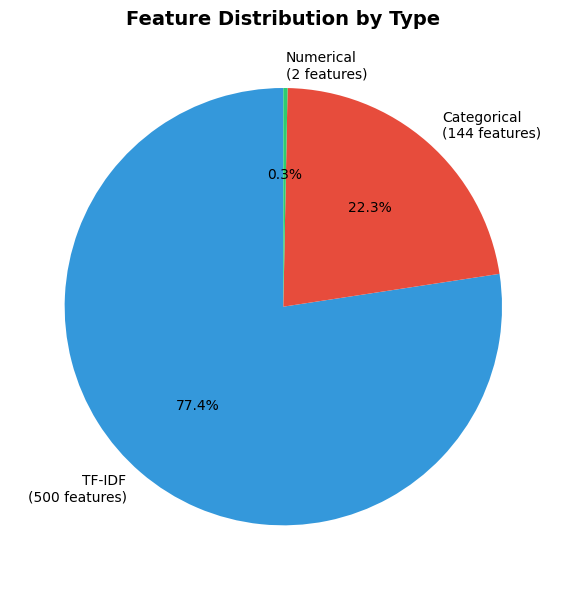

✅ Saved: feature_distribution.png

📊 FINAL SUMMARY STATISTICS

ITEM-FEATURE MATRIX:
  • Shape: 537 items × 646 features
  • Sparsity: 96.97%
  • Memory: ~0.08 MB

FEATURE COMPOSITION:
  • Text features: 77.4%
  • Categorical features: 22.3%
  • Numerical features: 0.3%

READY FOR:
  ✓ Building user profiles
  ✓ Computing similarity scores
  ✓ Generating recommendations

✅ STEP 3 COMPLETE: FEATURE EXTRACTION AND DOCUMENTATION


In [ ]:
# ============================================================================
# STEP 3.3: FEATURE SELECTION DOCUMENTATION
# ============================================================================

print("\n" + "="*70)
print("STEP 3.3: FEATURE SELECTION DOCUMENTATION")
print("="*70)

# ----------------------------------------------------------------------------
# Create Feature Summary Table
# ----------------------------------------------------------------------------

print("\n📋 Creating feature summary table...")

# Prepare data for the table
feature_summary_data = {
    'Feature Type': [
        'TF-IDF (Text)',
        'Categorical (One-Hot)',
        'Numerical (Normalized)',
        'TOTAL'
    ],
    'Count': [
        tfidf_matrix.shape[1],
        categorical_encoded.shape[1],
        numerical_sparse.shape[1],
        item_feature_matrix.shape[1]
    ],
    'Feature Names': [
        'Course titles, skills, keywords, modules',
        ', '.join(categorical_features),
        ', '.join(numerical_features),
        'All combined'
    ],
    'Representation': [
        f'{tfidf_matrix.shape[1]} most important words/phrases',
        f'{categorical_encoded.shape[1]} binary indicator variables',
        f'{numerical_sparse.shape[1]} normalized continuous values',
        f'{item_feature_matrix.shape[1]} total features'
    ]
}

# Create DataFrame
feature_summary_df = pd.DataFrame(feature_summary_data)

# Display the table
print("\n" + "="*70)
print("📊 FEATURE SELECTION SUMMARY")
print("="*70)
print(feature_summary_df.to_string(index=False))

# ----------------------------------------------------------------------------
# Detailed Breakdown by Category
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("🔍 DETAILED FEATURE BREAKDOWN")
print("="*70)

# TF-IDF Features
print("\n1️⃣ TEXT FEATURES (TF-IDF):")
print(f"   • Method: TF-IDF Vectorization")
print(f"   • Source columns: title_norm, Skill gain, Keyword, Modules")
print(f"   • Weighting: Title(×3), Skills(×2), Keyword(×2), Modules(×1)")
print(f"   • Vocabulary size: {len(feature_names)} words/phrases")
print(f"   • Parameters: max_features=500, min_df=2, max_df=0.8, ngram_range=(1,2)")
print(f"   • Sample words: {', '.join(feature_names[:10])}")

# Categorical Features
print("\n2️⃣ CATEGORICAL FEATURES (One-Hot Encoded):")
print(f"   • Method: One-Hot Encoding")
print(f"   • Original columns: {len(categorical_features)}")
print(f"   • Encoded columns: {categorical_encoded.shape[1]}")
for feat in categorical_features:
    unique_count = df_merged_clean[feat].nunique()
    print(f"   • {feat}: {unique_count} unique values")

# Show sample encoded feature names
print(f"\n   Sample encoded features:")
for i, name in enumerate(categorical_feature_names[:10], 1):
    print(f"     {i}. {name}")

# Numerical Features
print("\n3️⃣ NUMERICAL FEATURES (Normalized):")
print(f"   • Method: StandardScaler (Z-score normalization)")
print(f"   • Features: {len(numerical_features)}")
for feat in numerical_features:
    original_stats = df_merged_clean[feat].describe()
    print(f"\n   • {feat}:")
    print(f"     Original range: [{original_stats['min']:.2f}, {original_stats['max']:.2f}]")
    print(f"     Mean: {original_stats['mean']:.2f}, Std: {original_stats['std']:.2f}")
    print(f"     After normalization: ≈ [-3, +3] with mean=0, std=1")

# ----------------------------------------------------------------------------
# Rationale for Feature Selection
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("💡 FEATURE SELECTION RATIONALE")
print("="*70)

rationale = """
WHY THESE FEATURES?

1. TEXT FEATURES (TF-IDF):
   ✓ Captures semantic content of courses
   ✓ Identifies unique keywords that distinguish courses
   ✓ Weighted combination gives importance to title and skills
   ✓ Bigrams (e.g., "machine learning") capture multi-word concepts

2. CATEGORICAL FEATURES:
   ✓ Keyword: Subject domain (e.g., Computer Science, Business)
   ✓ Level: Difficulty (Beginner, Intermediate, Advanced)
   ✓ Offered By: Institution reputation/brand
   ✓ One-hot encoding allows model to learn category relationships

3. NUMERICAL FEATURES:
   ✓ Duration: Course length preference
   ✓ Number of Reviews: Popularity indicator
   ✓ Normalization ensures equal weight with other features

WHAT WE EXCLUDED:
   ✗ Schedule: All courses have "Flexible schedule" (no variance)
   ✗ Instructor: Too many unique values (creates sparse features)
   ✗ What you will learn: High missing rate (>50% null values)
"""

print(rationale)

# ----------------------------------------------------------------------------
# Save Feature Names for Later Use
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("💾 SAVING FEATURE INFORMATION")
print("="*70)

# Create a complete list of all feature names
all_feature_names = (
    list(feature_names) +  # TF-IDF features
    list(categorical_feature_names) +  # Categorical features
    numerical_features  # Numerical features
)

print(f"✅ Total feature names saved: {len(all_feature_names)}")
print(f"   • TF-IDF: {len(feature_names)}")
print(f"   • Categorical: {len(categorical_feature_names)}")
print(f"   • Numerical: {len(numerical_features)}")

# Save to a dictionary for easy access
feature_info = {
    'total_features': item_feature_matrix.shape[1],
    'tfidf_features': tfidf_matrix.shape[1],
    'categorical_features': categorical_encoded.shape[1],
    'numerical_features': numerical_sparse.shape[1],
    'feature_names': all_feature_names,
    'tfidf_vocabulary': list(feature_names),
    'categorical_columns': categorical_features,
    'numerical_columns': numerical_features
}

print("\n✅ Feature information stored in 'feature_info' dictionary")

# ----------------------------------------------------------------------------
# Visual Summary
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("📈 VISUAL FEATURE DISTRIBUTION")
print("="*70)

import matplotlib.pyplot as plt

# Create a pie chart of feature distribution
fig, ax = plt.subplots(figsize=(8, 6))

sizes = [
    tfidf_matrix.shape[1],
    categorical_encoded.shape[1],
    numerical_sparse.shape[1]
]
labels = [
    f'TF-IDF\n({sizes[0]} features)',
    f'Categorical\n({sizes[1]} features)',
    f'Numerical\n({sizes[2]} features)'
]
colors = ['#3498db', '#e74c3c', '#2ecc71']

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Feature Distribution by Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: feature_distribution.png")

# ----------------------------------------------------------------------------
# Summary Statistics
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("📊 FINAL SUMMARY STATISTICS")
print("="*70)

print(f"""
ITEM-FEATURE MATRIX:
  • Shape: {item_feature_matrix.shape[0]} items × {item_feature_matrix.shape[1]} features
  • Sparsity: {(1 - item_feature_matrix.nnz / (item_feature_matrix.shape[0] * item_feature_matrix.shape[1])) * 100:.2f}%
  • Memory: ~{item_feature_matrix.data.nbytes / (1024**2):.2f} MB

FEATURE COMPOSITION:
  • Text features: {(tfidf_matrix.shape[1] / item_feature_matrix.shape[1]) * 100:.1f}%
  • Categorical features: {(categorical_encoded.shape[1] / item_feature_matrix.shape[1]) * 100:.1f}%
  • Numerical features: {(numerical_sparse.shape[1] / item_feature_matrix.shape[1]) * 100:.1f}%

READY FOR:
  ✓ Building user profiles
  ✓ Computing similarity scores
  ✓ Generating recommendations
""")

print("="*70)
print("✅ STEP 3 COMPLETE: FEATURE EXTRACTION AND DOCUMENTATION")
print("="*70)

 User Profile Construction

In [ ]:
# ============================================================================
# STEP 4.1: PREPARE USER-ITEM RATING MATRIX
# ============================================================================

print("\n" + "="*70)
print("STEP 4.1: PREPARE USER-ITEM RATING MATRIX")
print("="*70)

# ----------------------------------------------------------------------------
# Create user-course mapping
# ----------------------------------------------------------------------------

print("\n🔄 Creating user-course rating matrix...")

# Get unique users and courses
unique_users = df_reviews['reviewers'].unique()
unique_courses = df_merged['course_id'].unique()

print(f"📊 Dataset statistics:")
print(f"   • Unique users: {len(unique_users):,}")
print(f"   • Unique courses: {len(unique_courses)}")
print(f"   • Total ratings: {len(df_reviews):,}")

# Create course_id to index mapping (for our feature matrix)
course_id_to_idx = {course_id: idx for idx, course_id in enumerate(df_merged['course_id'])}

# Verify all review courses are in our merged dataset
reviews_in_merged = df_reviews['course_id'].isin(course_id_to_idx.keys())
print(f"   • Reviews matching merged courses: {reviews_in_merged.sum():,} ({reviews_in_merged.sum()/len(df_reviews)*100:.1f}%)")

# Filter to only matched courses
df_reviews_matched = df_reviews[reviews_in_merged].copy()

print(f"\n✅ Rating matrix prepared")
print(f"   Working with {len(df_reviews_matched):,} ratings")

# Show sample ratings
print(f"\n📝 Sample ratings:")
print(df_reviews_matched[['reviewers', 'course_id', 'rating']].head(10).to_string(index=False))


STEP 4.1: PREPARE USER-ITEM RATING MATRIX

🔄 Creating user-course rating matrix...
📊 Dataset statistics:
   • Unique users: 254,963
   • Unique courses: 537
   • Total ratings: 447,604
   • Reviews matching merged courses: 447,604 (100.0%)

✅ Rating matrix prepared
   Working with 447,604 ratings

📝 Sample ratings:
     reviewers                course_id  rating
   By Robert S google-cbrs-cpi-training       4
By Gabriel E R google-cbrs-cpi-training       4
    By Jacob D google-cbrs-cpi-training       4
     By Dale B google-cbrs-cpi-training       4
     By Sean G google-cbrs-cpi-training       4
   By Daniel F google-cbrs-cpi-training       4
    By Logan D google-cbrs-cpi-training       5
   By Luis M C google-cbrs-cpi-training       5
    By scott w google-cbrs-cpi-training       5
     By Ryan H google-cbrs-cpi-training       5


In [ ]:
# ============================================================================
# STEP 4.2: BUILD USER PROFILES (WEIGHTED AVERAGE)
# ============================================================================

print("\n" + "="*70)
print("STEP 4.2: BUILD USER PROFILES (WEIGHTED AVERAGE)")
print("="*70)

from scipy.sparse import lil_matrix, csr_matrix
import numpy as np

# ----------------------------------------------------------------------------
# Build user profile function
# ----------------------------------------------------------------------------

def build_user_profile(user_id, df_reviews_matched, item_feature_matrix, course_id_to_idx):
    """
    Build user profile as weighted average of rated item features

    How it works:
    1. Get all courses the user rated
    2. Get the feature vector for each course
    3. Weight each vector by the rating (1-5 stars)
    4. Average them: profile = Σ(rating × features) / Σ(ratings)

    Example:
    User rated:
      - Course A (features=[0.5, 0.2, 0.1]) with rating=5
      - Course B (features=[0.1, 0.8, 0.3]) with rating=3

    Profile = (5×[0.5,0.2,0.1] + 3×[0.1,0.8,0.3]) / (5+3)
            = [2.5,1.0,0.5] + [0.3,2.4,0.9] / 8
            = [2.8,3.4,1.4] / 8
            = [0.35, 0.425, 0.175]

    This means: User prefers features similar to highly-rated courses!
    """

    # Get user's ratings
    user_ratings = df_reviews_matched[df_reviews_matched['reviewers'] == user_id]

    if len(user_ratings) == 0:
        return None  # No ratings (shouldn't happen with our filtered data)

    # Initialize weighted sum and total weight
    weighted_sum = np.zeros(item_feature_matrix.shape[1])
    total_weight = 0

    # For each rated course
    for _, row in user_ratings.iterrows():
        course_id = row['course_id']
        rating = row['rating']

        # Get course index in feature matrix
        if course_id in course_id_to_idx:
            course_idx = course_id_to_idx[course_id]

            # Get course features (convert to dense array)
            course_features = item_feature_matrix[course_idx].toarray().flatten()

            # Add weighted features
            weighted_sum += rating * course_features
            total_weight += rating

    # Calculate weighted average
    if total_weight > 0:
        user_profile = weighted_sum / total_weight
    else:
        user_profile = weighted_sum  # Shouldn't happen

    return user_profile

print("\n✅ User profile function defined")

# ----------------------------------------------------------------------------
# Build profiles for sample users
# ----------------------------------------------------------------------------

print("\n🔄 Building profiles for sample users...")

# Select sample users (with different activity levels)
sample_users = df_reviews_matched['reviewers'].value_counts().head(5).index.tolist()

sample_profiles = {}
for user_id in sample_users:
    profile = build_user_profile(user_id, df_reviews_matched, item_feature_matrix, course_id_to_idx)
    sample_profiles[user_id] = profile

    # Get user stats
    user_rating_count = len(df_reviews_matched[df_reviews_matched['reviewers'] == user_id])
    print(f"\n   User: {user_id}")
    print(f"   • Ratings: {user_rating_count}")
    print(f"   • Profile shape: {profile.shape}")
    print(f"   • Profile sample (first 5 values): {profile[:5]}")

print(f"\n✅ Built {len(sample_profiles)} sample user profiles")


STEP 4.2: BUILD USER PROFILES (WEIGHTED AVERAGE)

✅ User profile function defined

🔄 Building profiles for sample users...

   User: By Deleted A
   • Ratings: 1628
   • Profile shape: (646,)
   • Profile sample (first 5 values): [0.00034204 0.00760206 0.00095922 0.00279715 0.00279083]

   User: By Muhammad A
   • Ratings: 198
   • Profile shape: (646,)
   • Profile sample (first 5 values): [0.         0.01007834 0.00178509 0.0035533  0.        ]

   User: By Abhishek S
   • Ratings: 136
   • Profile shape: (646,)
   • Profile sample (first 5 values): [0.         0.         0.         0.00181739 0.00615531]

   User: By David M
   • Ratings: 130
   • Profile shape: (646,)
   • Profile sample (first 5 values): [0.         0.00552041 0.00137892 0.00171479 0.00114578]

   User: By Michael S
   • Ratings: 127
   • Profile shape: (646,)
   • Profile sample (first 5 values): [0.         0.01723366 0.         0.00192052 0.02061742]

✅ Built 5 sample user profiles


In [ ]:
# ============================================================================
# STEP 4.3: HANDLE COLD-START USERS
# ============================================================================

print("\n" + "="*70)
print("STEP 4.3: HANDLE COLD-START USERS")
print("="*70)

# ----------------------------------------------------------------------------
# Identify cold-start users
# ----------------------------------------------------------------------------

print("\n🔍 Identifying cold-start users...")

# Count ratings per user
user_rating_counts = df_reviews_matched['reviewers'].value_counts()

# Define cold-start threshold
COLD_START_THRESHOLD = 5  # Users with ≤5 ratings

cold_start_users = user_rating_counts[user_rating_counts <= COLD_START_THRESHOLD].index.tolist()
warm_start_users = user_rating_counts[user_rating_counts > COLD_START_THRESHOLD].index.tolist()

print(f"📊 User distribution:")
print(f"   • Cold-start users (≤{COLD_START_THRESHOLD} ratings): {len(cold_start_users):,} ({len(cold_start_users)/len(user_rating_counts)*100:.1f}%)")
print(f"   • Warm-start users (>{COLD_START_THRESHOLD} ratings): {len(warm_start_users):,} ({len(warm_start_users)/len(user_rating_counts)*100:.1f}%)")

# ----------------------------------------------------------------------------
# Create popular item profile
# ----------------------------------------------------------------------------

print("\n🔄 Creating popular item profile for cold-start users...")

# Method: Average features of top popular courses (by review count)
top_popular_courses = df_merged.nlargest(20, 'Number of Review')['course_id'].tolist()

print(f"   Using top {len(top_popular_courses)} popular courses:")
for i, cid in enumerate(top_popular_courses[:5], 1):
    course_name = df_merged[df_merged['course_id']==cid]['title_norm'].values[0]
    review_count = df_merged[df_merged['course_id']==cid]['Number of Review'].values[0]
    print(f"   {i}. {course_name[:40]:40s} ({review_count:,} reviews)")

# Calculate average of popular course features
popular_course_features = []
for course_id in top_popular_courses:
    if course_id in course_id_to_idx:
        idx = course_id_to_idx[course_id]
        features = item_feature_matrix[idx].toarray().flatten()
        popular_course_features.append(features)

# Average them
popular_item_profile = np.mean(popular_course_features, axis=0)

print(f"\n✅ Popular item profile created")
print(f"   • Based on {len(popular_course_features)} popular courses")
print(f"   • Profile shape: {popular_item_profile.shape}")

# ----------------------------------------------------------------------------
# Build profiles for ALL users (including cold-start)
# ----------------------------------------------------------------------------

print("\n🔄 Building profiles for ALL users...")

def build_user_profile_with_coldstart(user_id, df_reviews_matched, item_feature_matrix,
                                       course_id_to_idx, popular_item_profile,
                                       cold_start_threshold=5):
    """
    Build user profile with cold-start handling

    Strategy:
    - If user has > threshold ratings: Use weighted average (normal)
    - If user has ≤ threshold ratings: Blend with popular profile
      → 70% user's profile + 30% popular profile
    """

    # Get user's ratings
    user_ratings = df_reviews_matched[df_reviews_matched['reviewers'] == user_id]
    num_ratings = len(user_ratings)

    if num_ratings == 0:
        return popular_item_profile  # Pure cold-start: use popular profile

    # Build user's profile (weighted average)
    weighted_sum = np.zeros(item_feature_matrix.shape[1])
    total_weight = 0

    for _, row in user_ratings.iterrows():
        course_id = row['course_id']
        rating = row['rating']

        if course_id in course_id_to_idx:
            course_idx = course_id_to_idx[course_id]
            course_features = item_feature_matrix[course_idx].toarray().flatten()
            weighted_sum += rating * course_features
            total_weight += rating

    user_profile = weighted_sum / total_weight if total_weight > 0 else weighted_sum

    # Cold-start blending
    if num_ratings <= cold_start_threshold:
        # Blend: 70% user + 30% popular
        blended_profile = 0.7 * user_profile + 0.3 * popular_item_profile
        return blended_profile
    else:
        # Warm start: use pure user profile
        return user_profile

print(f"✅ Enhanced profile function with cold-start handling defined")

# Test on sample users
print(f"\n📝 Testing on sample users:")
test_users = [
    (cold_start_users[0] if len(cold_start_users) > 0 else None, 'Cold-start'),
    (warm_start_users[0] if len(warm_start_users) > 0 else None, 'Warm-start')
]

for user_id, user_type in test_users:
    if user_id is not None:
        profile = build_user_profile_with_coldstart(
            user_id, df_reviews_matched, item_feature_matrix,
            course_id_to_idx, popular_item_profile
        )
        num_ratings = len(df_reviews_matched[df_reviews_matched['reviewers'] == user_id])
        print(f"\n   {user_type} User: {user_id}")
        print(f"   • Ratings: {num_ratings}")
        print(f"   • Profile created: ✅")
        print(f"   • Profile shape: {profile.shape}")

print("\n" + "="*70)
print("✅ STEP 4.3 COMPLETE: Cold-start handling implemented")
print("="*70)


STEP 4.3: HANDLE COLD-START USERS

🔍 Identifying cold-start users...
📊 User distribution:
   • Cold-start users (≤5 ratings): 245,853 (96.4%)
   • Warm-start users (>5 ratings): 9,110 (3.6%)

🔄 Creating popular item profile for cold-start users...
   Using top 20 popular courses:
   1. programming for everybody getting starte (225,830 reviews)
   2. technical support fundamentals           (147,559 reviews)
   3. neural networks and deep learning        (120,548 reviews)
   4. python data structures                   (94,367 reviews)
   5. learning how to learn powerful mental to (88,415 reviews)

✅ Popular item profile created
   • Based on 20 popular courses
   • Profile shape: (646,)

🔄 Building profiles for ALL users...
✅ Enhanced profile function with cold-start handling defined

📝 Testing on sample users:

   Cold-start User: By Spencer M
   • Ratings: 5
   • Profile created: ✅
   • Profile shape: (646,)

   Warm-start User: By Deleted A
   • Ratings: 1628
   • Profile created: 

In [ ]:
# ============================================================================
# STEP 5: SIMILARITY COMPUTATION AND RECOMMENDATIONS
# ============================================================================
print("="*70)
print("STEP 5: CONTENT-BASED RECOMMENDATIONS")
print("="*70)

from sklearn.metrics.pairwise import cosine_similarity

# ----------------------------------------------------------------------------
# 5.1: SELECT TARGET USERS AND ITEMS
# ----------------------------------------------------------------------------
print("\n🎯 Selecting target users and items...")

# Get user rating stats
user_rating_counts = df_reviews_matched['reviewers'].value_counts()
user_rating_pct = (user_rating_counts / len(df_merged)) * 100

# Select 3 target users
U1 = user_rating_pct[user_rating_pct < 2].index[0]  # Cold user
U2 = user_rating_pct[(user_rating_pct >= 2) & (user_rating_pct < 5)].index[0]  # Medium
U3 = user_rating_pct[user_rating_pct >= 10].index[0]  # Rich user

# Select 2 target items
course_popularity = df_reviews_matched['course_id'].value_counts()
I1 = course_popularity[course_popularity <= course_popularity.quantile(0.25)].index[0]  # Unpopular
I2 = course_popularity[course_popularity >= course_popularity.quantile(0.50)].index[5]  # Popular

# Print summary
print(f"\n✅ Target Users:")
for label, user in [('U1', U1), ('U2', U2), ('U3', U3)]:
    print(f"   {label}: {user} ({user_rating_counts[user]} ratings, {user_rating_pct[user]:.2f}%)")

print(f"\n✅ Target Items:")
print(f"   I1: {I1} ({course_popularity[I1]} reviews)")
print(f"   I2: {I2} ({course_popularity[I2]} reviews)")

# ----------------------------------------------------------------------------
# 5.2: BUILD PROFILES FOR TARGET USERS
# ----------------------------------------------------------------------------
print("\n🔄 Building user profiles...")

user_profiles = {}
for label, user in [('U1', U1), ('U2', U2), ('U3', U3)]:
    profile = build_user_profile(user, df_reviews_matched, item_feature_matrix, course_id_to_idx)
    user_profiles[label] = profile
    print(f"   ✅ {label} profile built")

# ----------------------------------------------------------------------------
# 5.3: COMPUTE SIMILARITY & GENERATE RECOMMENDATIONS
# ----------------------------------------------------------------------------
print("\n🔄 Computing similarities and generating recommendations...")

recommendations = {'top_10': {}, 'top_20': {}}

for label, profile in user_profiles.items():
    user_id = {'U1': U1, 'U2': U2, 'U3': U3}[label]

    # Compute cosine similarity
    similarities = cosine_similarity(profile.reshape(1, -1), item_feature_matrix).flatten()

    # Create DataFrame with scores
    sim_df = pd.DataFrame({
        'course_id': df_merged['course_id'],
        'title': df_merged['title_norm'],
        'score': similarities
    }).sort_values('score', ascending=False)

    # Remove already-rated courses
    user_rated = df_reviews_matched[df_reviews_matched['reviewers'] == user_id]['course_id'].unique()
    sim_df = sim_df[~sim_df['course_id'].isin(user_rated)].reset_index(drop=True)

    # Get top-10 and top-20
    recommendations['top_10'][label] = sim_df.head(10)
    recommendations['top_20'][label] = sim_df.head(20)

    # Display results
    print(f"\n{'='*70}")
    print(f"📋 {label} TOP-10 RECOMMENDATIONS")
    print(f"{'='*70}")
    print(sim_df.head(10)[['course_id', 'title', 'score']].to_string(index=False))

    # Check if I1, I2 are in recommendations
    if I1 in sim_df.head(10)['course_id'].values:
        rank = sim_df[sim_df['course_id'] == I1].index[0] + 1
        print(f"\n   ✓ I1 is ranked #{rank}")
    if I2 in sim_df.head(10)['course_id'].values:
        rank = sim_df[sim_df['course_id'] == I2].index[0] + 1
        print(f"   ✓ I2 is ranked #{rank}")

print("\n✅ STEP 5 COMPLETE")
print("="*70)

STEP 5: CONTENT-BASED RECOMMENDATIONS

🎯 Selecting target users and items...

✅ Target Users:
   U1: By June L (10 ratings, 1.86%)
   U2: By Muhammad N (26 ratings, 4.84%)
   U3: By Deleted A (1628 ratings, 303.17%)

✅ Target Items:
   I1: introduction-trading-machine-learning-gcp (138 reviews)
   I2: the-science-of-well-being (8199 reviews)

🔄 Building user profiles...
   ✅ U1 profile built
   ✅ U2 profile built
   ✅ U3 profile built

🔄 Computing similarities and generating recommendations...

📋 U1 TOP-10 RECOMMENDATIONS
                     course_id                                                                                title    score
 neural-networks-deep-learning                                                    neural networks and deep learning 0.920878
           deep-neural-network improving deep neural networks hyperparameter tuning regularization and optimization 0.917584
                        python                                programming for everybody getting s

In [ ]:
# ============================================================================
# STEP 6: k-NEAREST NEIGHBORS (k-NN) - FIXED VERSION
# ============================================================================
print("\n" + "="*70)
print("STEP 6: k-NEAREST NEIGHBORS (k-NN)")
print("="*70)

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# ----------------------------------------------------------------------------
# 6.1: FIND k MOST SIMILAR ITEMS FOR EACH ITEM
# ----------------------------------------------------------------------------
print("\n🔄 Step 6.1: Finding k most similar items for each course...")

def find_similar_items_fixed(item_feature_matrix, k=10):
    """
    Find k most similar items using cosine similarity (NOT cosine distance)
    Returns: similarities and indices of k nearest neighbors
    """
    # Compute full similarity matrix (all items vs all items)
    similarity_matrix = cosine_similarity(item_feature_matrix, item_feature_matrix)

    # For each item, find k most similar items (excluding itself)
    n_items = similarity_matrix.shape[0]
    indices = np.zeros((n_items, k), dtype=int)
    similarities = np.zeros((n_items, k))

    for i in range(n_items):
        # Get similarities for item i
        item_sims = similarity_matrix[i]

        # Get indices sorted by similarity (descending)
        sorted_indices = np.argsort(item_sims)[::-1]

        # Remove item itself (first index, similarity=1.0)
        sorted_indices = sorted_indices[1:k+1]

        # Store k most similar items
        indices[i] = sorted_indices
        similarities[i] = item_sims[sorted_indices]

    return similarities, indices

# Find k=10 and k=20 neighbors
print("\n   Finding k=10 neighbors...")
similarities_k10, indices_k10 = find_similar_items_fixed(item_feature_matrix, k=10)
print(f"   ✅ Found 10 neighbors for each of {len(similarities_k10)} courses")

print("\n   Finding k=20 neighbors...")
similarities_k20, indices_k20 = find_similar_items_fixed(item_feature_matrix, k=20)
print(f"   ✅ Found 20 neighbors for each of {len(similarities_k20)} courses")

# Verify similarity ranges (should be 0 to 1)
print(f"\n   ✓ Similarity range check (k=10):")
print(f"     Min: {similarities_k10.min():.4f} (should be ≥ 0)")
print(f"     Max: {similarities_k10.max():.4f} (should be ≤ 1)")

# ----------------------------------------------------------------------------
# Show similar items for target items I1 and I2
# ----------------------------------------------------------------------------
print("\n" + "-"*70)
print("📊 Similar Items for Target Items (I1 and I2)")
print("-"*70)

# Get indices of I1 and I2 in the feature matrix
i1_idx = df_merged[df_merged['course_id'] == I1].index[0]
i2_idx = df_merged[df_merged['course_id'] == I2].index[0]

# Display similar items for I1 (k=10)
print(f"\n🎯 Top-10 Similar Courses to I1 ({I1}):")
print(f"   Title: {df_merged.iloc[i1_idx]['title_norm']}")
print("\n   Rank | Course ID | Title | Similarity")
print("   " + "-"*65)
for rank, (sim_idx, similarity) in enumerate(zip(indices_k10[i1_idx], similarities_k10[i1_idx]), 1):
    course_id = df_merged.iloc[sim_idx]['course_id']
    title = df_merged.iloc[sim_idx]['title_norm'][:40]
    print(f"   {rank:4d} | {course_id:30s} | {title:40s} | {similarity:.4f}")

# Display similar items for I2 (k=10)
print(f"\n🎯 Top-10 Similar Courses to I2 ({I2}):")
print(f"   Title: {df_merged.iloc[i2_idx]['title_norm']}")
print("\n   Rank | Course ID | Title | Similarity")
print("   " + "-"*65)
for rank, (sim_idx, similarity) in enumerate(zip(indices_k10[i2_idx], similarities_k10[i2_idx]), 1):
    course_id = df_merged.iloc[sim_idx]['course_id']
    title = df_merged.iloc[sim_idx]['title_norm'][:40]
    print(f"   {rank:4d} | {course_id:30s} | {title:40s} | {similarity:.4f}")

# Continue with rest of Step 6...
# (Keep 6.2 and 6.3 the same)


STEP 6: k-NEAREST NEIGHBORS (k-NN)

🔄 Step 6.1: Finding k most similar items for each course...

   Finding k=10 neighbors...
   ✅ Found 10 neighbors for each of 537 courses

   Finding k=20 neighbors...
   ✅ Found 20 neighbors for each of 537 courses

   ✓ Similarity range check (k=10):
     Min: 0.2981 (should be ≥ 0)
     Max: 0.9918 (should be ≤ 1)

----------------------------------------------------------------------
📊 Similar Items for Target Items (I1 and I2)
----------------------------------------------------------------------

🎯 Top-10 Similar Courses to I1 (introduction-trading-machine-learning-gcp):
   Title: introduction to trading machine learning gcp

   Rank | Course ID | Title | Similarity
   -----------------------------------------------------------------
      1 | fundamentals-of-reinforcement-learning | fundamentals of reinforcement learning   | 0.6442
      2 | machine-learning-with-python   | machine learning with python             | 0.6079
      3 | embedded-

part 3


In [ ]:
# ============================================================================
# SECTION 3.1: USER-ITEM RATING MATRIX
# ============================================================================

print("="*70)
print("SECTION 3.1: BUILD USER-ITEM RATING MATRIX")
print("="*70)

from scipy.sparse import csr_matrix

# Map users and courses to indices
user_ids = df_reviews_matched['reviewers'].unique()
course_ids = df_merged['course_id'].unique()

user_to_idx = {u: i for i, u in enumerate(user_ids)}
course_to_idx = {c: i for i, c in enumerate(course_ids)}

# Build sparse matrix
rows, cols, data = [], [], []

for _, row in df_reviews_matched.iterrows():
    rows.append(user_to_idx[row['reviewers']])
    cols.append(course_to_idx[row['course_id']])
    data.append(row['rating'])

rating_matrix = csr_matrix(
    (data, (rows, cols)),
    shape=(len(user_ids), len(course_ids))
)

print(f"✅ Rating matrix shape: {rating_matrix.shape}")
print(f"   Users: {rating_matrix.shape[0]}")
print(f"   Courses: {rating_matrix.shape[1]}")
print(f"   Sparsity: {(1 - rating_matrix.nnz / (rating_matrix.shape[0]*rating_matrix.shape[1]))*100:.2f}%")


SECTION 3.1: BUILD USER-ITEM RATING MATRIX
✅ Rating matrix shape: (254963, 537)
   Users: 254963
   Courses: 537
   Sparsity: 99.68%


In [ ]:
# ============================================================================
# SECTION 3.2: ITEM-BASED COLLABORATIVE FILTERING (COSINE)
# ============================================================================

print("\n" + "="*70)
print("SECTION 3.2: ITEM-BASED COLLABORATIVE FILTERING")
print("="*70)

from sklearn.metrics.pairwise import cosine_similarity

# Compute item-item similarity
item_similarity_cf = cosine_similarity(rating_matrix.T)

print(f"✅ Item-item similarity matrix shape: {item_similarity_cf.shape}")
print(f"   Similarity range: [{item_similarity_cf.min():.2f}, {item_similarity_cf.max():.2f}]")


In [ ]:
# ============================================================================
# SECTION 3.3: PREDICT RATINGS (ITEM-BASED CF) WITH CLIPPING
# ============================================================================

def predict_rating_item_cf(user_id, course_id, k=10):
    if user_id not in user_to_idx or course_id not in course_to_idx:
        return None

    u = user_to_idx[user_id]
    i = course_to_idx[course_id]

    user_ratings = rating_matrix[u].toarray().flatten()
    similarities = item_similarity_cf[i]

    rated_items = user_ratings > 0
    if rated_items.sum() == 0:
        return None

    top_k_idx = similarities[rated_items].argsort()[-k:]
    sim_scores = similarities[rated_items][top_k_idx]
    rating_scores = user_ratings[rated_items][top_k_idx]

    if sim_scores.sum() == 0:
        return None

    prediction = np.dot(sim_scores, rating_scores) / sim_scores.sum()

    # Clip the prediction to the range [1, 5]
    prediction = np.clip(prediction, 1, 5)

    return prediction


In [ ]:
# ============================================================================
# SECTION 3.4: SVD-BASED COLLABORATIVE FILTERING
# ============================================================================

print("\n" + "="*70)
print("SECTION 3.4: SVD MATRIX FACTORIZATION")
print("="*70)

from sklearn.decomposition import TruncatedSVD

k = 20  # latent factors (allowed: 10 or 20)

svd = TruncatedSVD(n_components=k, random_state=42)
U = svd.fit_transform(rating_matrix)
Sigma = svd.singular_values_
Vt = svd.components_

print(f"✅ SVD completed")
print(f"   U shape: {U.shape}")
print(f"   Σ shape: {Sigma.shape}")
print(f"   Vᵀ shape: {Vt.shape}")


In [ ]:
# ============================================================================
# SECTION 3.5: PREDICT RATINGS USING SVD (with scaling)
# ============================================================================

def predict_rating_svd(user_id, course_id):
    if user_id not in user_to_idx or course_id not in course_to_idx:
        return None

    u = user_to_idx[user_id]
    i = course_to_idx[course_id]

    raw_prediction = np.dot(U[u, :], Vt[:, i])
    user_mean = rating_matrix[u].data.mean() if rating_matrix[u].nnz > 0 else 3.0

    prediction = user_mean + raw_prediction
    prediction = np.clip(prediction, 1, 5)

    return prediction


In [ ]:
# ============================================================================
# SECTION 3.6: PREDICTIONS FOR TARGET USERS
# ============================================================================

print("\n" + "="*70)
print("SECTION 3.6: CF & SVD PREDICTIONS FOR TARGET USERS")
print("="*70)

targets = [(U1, I1), (U2, I2), (U3, I2)]

for user, item in targets:
    cf_pred = predict_rating_item_cf(user, item, k=10)
    svd_pred = predict_rating_svd(user, item)

    print(f"\nUser: {user} | Item: {item}")
    print(f"   Item-Based CF Prediction: {cf_pred:.2f}" if cf_pred else "   CF Prediction: N/A")
    print(f"   SVD Prediction: {svd_pred:.2f}" if svd_pred else "   SVD Prediction: N/A")


In [ ]:
# ============================================================================
# CONTENT-BASED SCORING FUNCTION
# ============================================================================

def get_cb_scores(user_id):
    user_profile = build_user_profile_with_coldstart(
        user_id, df_reviews_matched, item_feature_matrix, course_id_to_idx, popular_item_profile
    )
    cb_scores = cosine_similarity(
        user_profile.reshape(1, -1), item_feature_matrix
    ).flatten()
    return cb_scores

print("✅ Content-based scoring function ready!")


In [ ]:
# ============================================================================
# HYBRID RECOMMENDATION CELL
# ============================================================================

def get_hybrid_scores(user_id, alpha):
    # Get content-based scores
    cb_scores = get_cb_scores(user_id)
    # Get collaborative filtering scores
    cf_scores = get_cf_scores(user_id)

    # Normalize CF scores to be between 0 and 1
    cf_min, cf_max = cf_scores.min(), cf_scores.max()
    cf_scores_norm = (cf_scores - cf_min) / (cf_max - cf_min)

    # Combine scores using alpha
    hybrid_scores = alpha * cb_scores + (1 - alpha) * cf_scores_norm

    return hybrid_scores

print("✅ Hybrid scoring function ready!")


In [ ]:
# ============================================================================
# COLLABORATIVE FILTERING SCORING FUNCTION
# ============================================================================

def get_cf_scores(user_id):
    cf_scores = []

    for course_id in df_merged['course_id']:
        pred = predict_rating_item_cf(user_id, course_id, k=10)
        if pred is None:
            pred = 3.0  # neutral rating if no prediction
        cf_scores.append(pred)

    return np.array(cf_scores)

print("✅ Collaborative filtering scoring function ready!")


In [ ]:
# ============================================================================
# TEST AND SELECT BEST ALPHA
# ============================================================================

alphas = [0.3, 0.5, 0.7]
test_user_id = U2  # For example, use a medium-activity user

best_alpha = None
best_performance = -float('inf')  # Assume higher score is better for simplicity

for alpha in alphas:
    scores = get_hybrid_scores(test_user_id, alpha)
    # For simplicity, let’s just take the mean score as a "performance" metric
    performance = scores.mean()

    print(f"Alpha {alpha}: average score = {performance:.4f}")

    if performance > best_performance:
        best_performance = performance
        best_alpha = alpha

print(f"\n✅ Best alpha selected: {best_alpha} with average score = {best_performance:.4f}")
